# Behavioral Analysis

## Imports and functions

In [43]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os
from os import listdir
from os.path import isfile, join
from pathlib import Path
import pandas as pd
import tkinter as tk
from tkinter import filedialog

from unityvr.preproc import logproc as lp
from unityvr.analysis import posAnalysis
from unityvr.viz import viz, utils

### Util Functions

In [63]:
def select_file_path(prompt="Select File", initialdir=r"Z:\FlyVR\FlyVR data"):
    root = tk.Tk()
    root.withdraw()
    root.attributes("-topmost", 1)

    file_path_str = filedialog.askopenfilename(title=prompt, initialdir=initialdir)
    if file_path_str == "":
        print("File selection canceled")
        return None
    file_path = Path(file_path_str)
    return file_path

### Plotting Functions

In [76]:
def plot_dark_stim():
    pass

## Select data files

In [74]:
# Select unity vr file from the dark trial segment
dark_stim_path = select_file_path(prompt="Select dark stim file")

In [53]:
# Select unity vr file from the grating trial segment
grating_stim_path = select_file_path(prompt="Select grating stim file")

In [54]:
# Select unity vr file from the closed loop trial segment
closed_loop_stim_path = select_file_path(prompt="Select closed loop stim file")

In [75]:
print("Data Files Chosen:")
print(f"Dark stimuli file: {dark_stim_path}")
print(f"Grating stimuli file: {grating_stim_path}")
print(f"Closed loop stimuli file: {closed_loop_stim_path}")

Data Files Chosen:
Dark stimuli file: Z:\FlyVR\FlyVR data\Edwin\2023-07-11\trial1\Log_2023-07-11_12-38-39.json
Grating stimuli file: Z:\FlyVR\FlyVR data\Edwin\2023-07-11\trial1\Log_2023-07-11_12-44-55.json
Closed loop stimuli file: Z:\FlyVR\FlyVR data\Edwin\2023-07-11\trial1\Log_2023-07-11_12-52-31.json


## Parse Data

In [28]:
uvr_dict = {
    'dark_stim': lp.constructUnityVRexperiment(dark_stim_path.parent, dark_stim_path.name),
    'grating_stim': lp.constructUnityVRexperiment(grating_stim_path.parent, grating_stim_path.name),
    'closed_loop_stim': lp.constructUnityVRexperiment(closed_loop_stim_path.parent, closed_loop_stim_path.name)
}

correcting for Unity angle convention.
correcting for Unity angle convention.
correcting for Unity angle convention.


## Create Plots

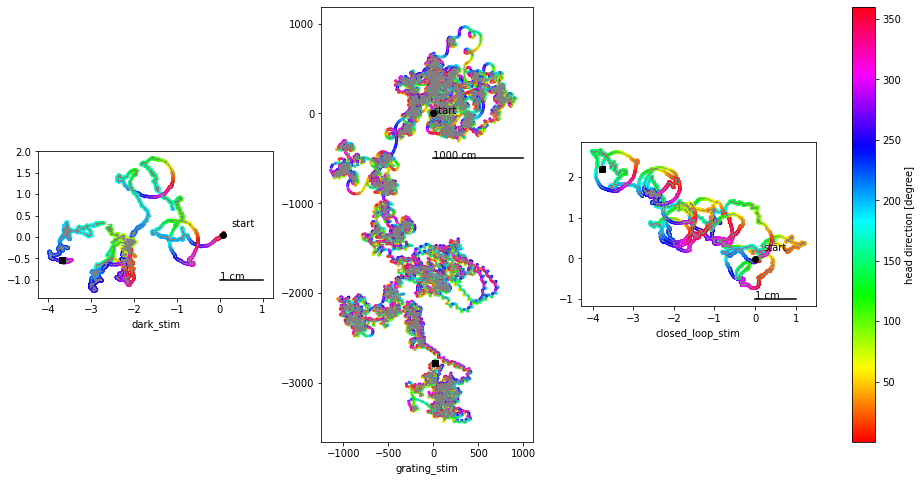

In [29]:
convfac = 10 # dc2cm

fig, axd = plt.subplot_mosaic("abcd", figsize=(15, 8),
                              gridspec_kw={'width_ratios':[1,1,1,0.1]})
for index, (trial_type, uvr) in zip("abc", uvr_dict.items()):
    axd[index].plot(uvr.posDf.x*convfac,uvr.posDf.y*convfac,color='grey', linewidth=0.5)
    cb = axd[index].scatter(uvr.posDf.x*convfac,uvr.posDf.y*convfac,s=5,c=uvr.posDf.angle, cmap='hsv')
    axd[index].plot(uvr.posDf.x[0]*convfac,uvr.posDf.y[0]*convfac,'ok')
    axd[index].text(uvr.posDf.x[0]*convfac+0.2,uvr.posDf.y[0]*convfac+0.2,'start')
    axd[index].plot(uvr.posDf.x.values[-1]*convfac,uvr.posDf.y.values[-2]*convfac,'sk')
    if index == 'b':
        utils.plotScaleBar(axd[index],1000,(0,-500),'1000 cm')
    else:
        utils.plotScaleBar(axd[index],1,(0,-1),'1 cm')
    axd[index].set_xlabel(trial_type)
    axd[index].set_aspect('equal')
plt.colorbar(cb,cax=axd['d'], label='head direction [degree]')